# CXI File Browser
This notebook provides a simple example to show you how to use the CXI file browser.

In [1]:
import cdiutils

cdiutils.plot.update_plot_params()

## Set up the file path
First, provide the path to the CXI file you want to explore.

In [ ]:
# Load the data
# Replace with the actual path to your data file
path = "path/to/your/data.cxi"

## Basic usage
Create an explorer instance and print a summary of the file contents.

The `CXIExplorer` provides four main methods for exploring CXI files:

1. `summarise()` - Provides an overview of the file including file size, number of groups and datasets
2. `tree(max_depth=None, show_attributes=False)` - Displays the hierarchical structure of the file in a tree format
3. `search(pattern)` - Finds datasets, groups, or attributes matching a specific pattern
4. `show(path)` - Visualises a specific dataset, with automatic plotting for array data

Additionally, the `explore()` method launches an interactive widget-based browser.

In [3]:
explorer = cdiutils.io.CXIExplorer(path)

explorer.summarise()

CXI File Summary: S706_postprocessed_data.cxi
File size: 142.77 MB
Groups: 45
Datasets: 198
Total data size: 142.65 MB

Entries: 1

entry_1:
  Default: data_1
  amplitude: 1
  data: 12
  detector: 1
  displacement: 2
  dspacing: 1
  geometry: 1
  het: 3
  image: 12
  lattice: 1
  numpy: 1
  parameters: 1
  phase: 1
  process: 1
  result: 5
  sample: 1
  source: 1
  support: 1
  surface: 1


## View hierarchical structure
Display the file's hierarchical structure as a tree, limiting depth for clarity.

In [4]:
explorer.tree(max_depth=2)

CXI File: S706_postprocessed_data.cxi
└── /
    ├── creator (scalar) object
    ├── cxi_version (scalar) int64
    ├── entry_1
    │   ├── amplitude -> /entry_1/image_1
    │   ├── data_1
    │   │   └── 1 more entrie(s)...
    │   ├── data_10
    │   │   └── 1 more entrie(s)...
    │   ├── data_11
    │   │   └── 1 more entrie(s)...
    │   ├── data_12
    │   │   └── 1 more entrie(s)...
    │   ├── data_2
    │   │   └── 1 more entrie(s)...
    │   ├── data_3
    │   │   └── 1 more entrie(s)...
    │   ├── data_4
    │   │   └── 1 more entrie(s)...
    │   ├── data_5
    │   │   └── 1 more entrie(s)...
    │   ├── data_6
    │   │   └── 1 more entrie(s)...
    │   ├── data_7
    │   │   └── 1 more entrie(s)...
    │   ├── data_8
    │   │   └── 1 more entrie(s)...
    │   ├── data_9
    │   │   └── 1 more entrie(s)...
    │   ├── detector_1
    │   │   └── 7 more entrie(s)...
    │   ├── displacement -> /entry_1/image_5
    │   ├── displacement_gradient -> /entry_1/image_6
    │   ├─

## Search functionality
Search for specific path using keywords.

Ex: you know that the dataset you are looking for contains the word "strain" in its name.

In [7]:
explorer.search("strain")

Found 16 matches for 'strain':
- Soft Link: entry_1/het_strain (soft link name match (→ /entry_1/image_7))
- Soft Link: entry_1/het_strain_from_dspacing (soft link name match (→ /entry_1/image_9))
- Soft Link: entry_1/het_strain_with_ramp (soft link name match (→ /entry_1/image_8))
- Soft Link: entry_1/numpy_het_strain (soft link name match (→ /entry_1/image_10))
- Group: entry_1/result_5/strain_averages (name match)
- Dataset: entry_1/result_5/strain_averages/bulk (name match)
- Dataset: entry_1/result_5/strain_averages/bulk_density (name match)
- Dataset: entry_1/result_5/strain_averages/overall (name match)
- Dataset: entry_1/result_5/strain_averages/surface (name match)
- Dataset: entry_1/result_5/strain_averages/surface_density (name match)
- Group: entry_1/result_5/strain_fwhms (name match)
- Dataset: entry_1/result_5/strain_fwhms/bulk (name match)
- Dataset: entry_1/result_5/strain_fwhms/bulk_density (name match)
- Dataset: entry_1/result_5/strain_fwhms/overall (name match)
- Da

## Display specific datasets
View the contents of a specific dataset by its path.

Path: entry_1/dspacing
Type: Soft Link → /entry_1/image_11
Target Content:

	Path: /entry_1/image_11
	Title: dspacing
	Type: Group with 5 items.
	Content:

		Path: /entry_1/image_11/data
		Type: Dataset
		Shape: (110, 110, 110)
		Dtype: float64
		Data summary: min=2.049, max=2.051, mean=2.050


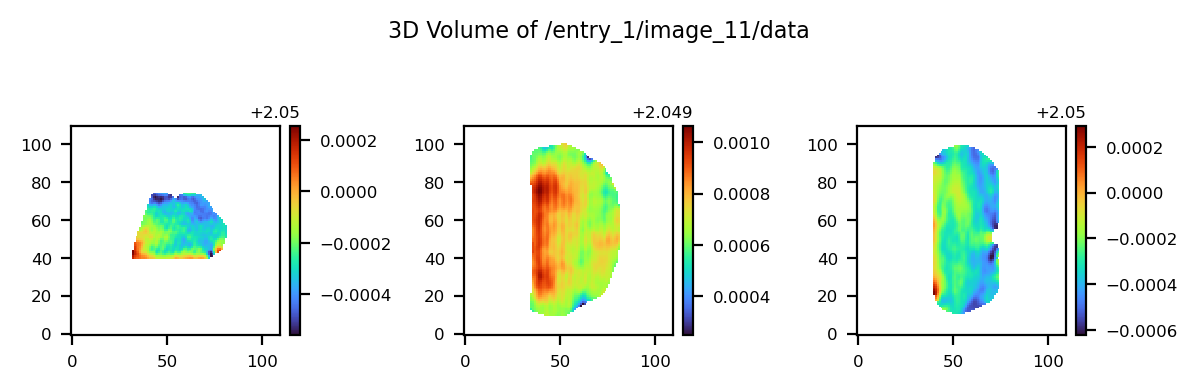


		Path: /entry_1/image_11/data_space
		Type: Dataset
		Value: Direct space

		Path: /entry_1/image_11/image_size
		Type: Dataset
		Shape: (3,)
		Dtype: int64
		Values: [110 110 110]

		Path: /entry_1/image_11/process_1
		Type: Soft Link → /entry_1/process_1

		Path: /entry_1/image_11/title
		Type: Dataset
		Value: dspacing


In [8]:
explorer.show("entry_1/dspacing")

## Interactive exploration
Launch an interactive browser to navigate through the file.

In [9]:
explorer.explore()

## Closing the explorer
Always close the explorer when finished to release file resources. When you delete the explorer (`del explorer`), the file will also be closed automatically.

In [10]:
explorer.close()

## Using context manager
A cleaner approach is to use the context manager, which automatically closes the file when done. Note that using the context manager prevents using the interactive `explore()` method after exiting the context.

File summary:
CXI File Summary: S706_postprocessed_data.cxi
File size: 142.77 MB
Groups: 45
Datasets: 198
Total data size: 142.65 MB

Entries: 1

entry_1:
  Default: data_1
  amplitude: 1
  data: 12
  detector: 1
  displacement: 2
  dspacing: 1
  geometry: 1
  het: 3
  image: 12
  lattice: 1
  numpy: 1
  parameters: 1
  phase: 1
  process: 1
  result: 5
  sample: 1
  source: 1
  support: 1
  surface: 1

Tree:
CXI File: S706_postprocessed_data.cxi
└── /
    ├── creator (scalar) object
    ├── cxi_version (scalar) int64
    ├── entry_1
    │   └── 47 more entrie(s)...
    ├── file_path (scalar) object
    ├── time (scalar) |S19
    └── version (scalar) object

Search specific key word:
Found 16 matches for 'strain':
- Soft Link: entry_1/het_strain (soft link name match (→ /entry_1/image_7))
- Soft Link: entry_1/het_strain_from_dspacing (soft link name match (→ /entry_1/image_9))
- Soft Link: entry_1/het_strain_with_ramp (soft link name match (→ /entry_1/image_8))
- Soft Link: entry_1/num

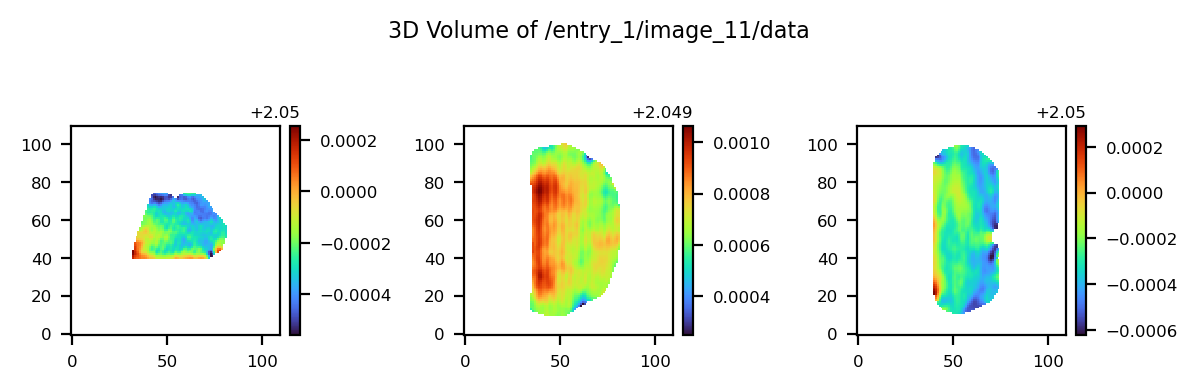


		Path: /entry_1/image_11/data_space
		Type: Dataset
		Value: Direct space

		Path: /entry_1/image_11/image_size
		Type: Dataset
		Shape: (3,)
		Dtype: int64
		Values: [110 110 110]

		Path: /entry_1/image_11/process_1
		Type: Soft Link → /entry_1/process_1

		Path: /entry_1/image_11/title
		Type: Dataset
		Value: dspacing


In [11]:
with cdiutils.io.CXIExplorer(path) as explorer:
    # Print a summary of the file
    print("File summary:")
    explorer.summarise()

    # Print the hierarchical tree structure
    print("\nTree:")
    explorer.tree(max_depth=1)

    # Search for specific datasets
    print("\nSearch specific key word:")
    explorer.search("strain")

    # Show a specific dataset
    print("\nShow specific dataset:")
    explorer.show("entry_1/dspacing")

## Direct use of CXIFile class
The `CXIExplorer` can also be accessed directly from the `CXIFile` class using `get_explorer()`, which returns a ready-to-use `CXIExplorer` instance.

In [12]:
cxi_file = cdiutils.CXIFile(path)

# Quick interactive exploration
print("Summary:")
cxi_file.get_explorer().summarise()

# or:
explorer = cxi_file.get_explorer()
print("\nTree:")
explorer.tree(max_depth=1)

# When finished
cxi_file.close()

Summary:
CXI File Summary: S706_postprocessed_data.cxi
File size: 142.77 MB
Groups: 45
Datasets: 198
Total data size: 142.65 MB

Entries: 1

entry_1:
  Default: data_1
  amplitude: 1
  data: 12
  detector: 1
  displacement: 2
  dspacing: 1
  geometry: 1
  het: 3
  image: 12
  lattice: 1
  numpy: 1
  parameters: 1
  phase: 1
  process: 1
  result: 5
  sample: 1
  source: 1
  support: 1
  surface: 1

Tree:
CXI File: S706_postprocessed_data.cxi
└── /
    ├── creator (scalar) object
    ├── cxi_version (scalar) int64
    ├── entry_1
    │   └── 47 more entrie(s)...
    ├── file_path (scalar) object
    ├── time (scalar) |S19
    └── version (scalar) object


## Load data from a CXI file
There are several ways to open a CXI file. The most common way is to use the `CXIFile` class, which provides a simple interface for reading and writing CXI files.
- You can load data from a CXI file using the classic approach:
<!-- ```python
cxi_file = CXIFile(file_path)
cxi_file.open()
data = cxi_file["entry_1/amplitude"]
cxi.close()  # Don't forget to close the file!
```
- Or you can use the context manager, i.e. the `with` statement to automatically close the file when done:
```python
with CXIFile(file_path) as cxi_file:
    data = cxi_file["entry_1/amplitude"]
```
- `cdiutils` provides a convenient function to load data from CXI files. You can specify the path to the CXI file and a dataset name to load. If the dataset name is not the exact full "key path", say `"voxel_size"` instead of `"entry_1/result_1/voxel_size"`, the function will find it for you anyway. Note that you can provide as much as keys as you want, and the function will return a dictionary with the keys as the dataset names and the values as the data loaded from the CXI file. -->



In [ ]:
cxi_file = cdiutils.CXIFile(path)
cxi_file.open()
data = cxi_file["entry_1/amplitude"]
cxi_file.close()  # Don't forget to close the file!

- Or you can use the context manager, i.e. the `with` statement to automatically close the file when done:

In [ ]:
with cdiutils.CXIFile(path) as cxi_file:
    data = cxi_file["entry_1/amplitude"]

- Finally, you can use the `cdiutils.io.load_cxi` function to conveniently load data from CXI files. The `cdiutils` library provides a convenient function to load data from CXI files. It requires the path to the CXI file and a dataset name to load. If the dataset name is not the exact full "key path", say `"voxel_size"` instead of `"entry_1/result_1/voxel_size"`, the function will find it for you anyway. Note that you can provide as much as keys as you want, and the function will return a dictionary with the keys as the dataset names and the values as the data loaded from the CXI file.

In [ ]:
voxel_size = cdiutils.io.load_cxi(path, "voxel_size")  # simple value

data = cdiutils.io.load_cxi(path, "amplitude", "het_strain")  # dictionary

print(data.keys())

## Credits
This notebook was created by Clément Atlan, ESRF, 2025. It is part of the `cdiutils` package, which provides tools for BCDI data analysis and visualisation.
If you have used this notebook or the `cdiutils` package in your research, please consider citing the package https://github.com/clatlan/cdiutils/
You'll find the citation information in the `cdiutils` package documentation.

```bibtex
@software{Atlan_Cdiutils_A_python,
author = {Atlan, Clement},
doi = {10.5281/zenodo.7656853},
license = {MIT},
title = {{Cdiutils: A python package for Bragg Coherent Diffraction Imaging processing, analysis and visualisation workflows}},
url = {https://github.com/clatlan/cdiutils},
version = {0.2.0}
}
```